# Telecom Churn- Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
- In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Import Packages:

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib.pyplot import xticks
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Step.1 Data Reading And Understanding

In [4]:
# Importing the data from csv file
tele_df=pd.read_csv("telecom_churn_data.csv")
tele_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
# checking data info
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
tele_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


##  Step 2. Data Cleaning & Preparation

In [7]:
# Checking the percentage of missing values
round(100*(tele_df.isnull().sum()/len(tele_df.index)),2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [8]:
new_df=tele_df.copy()
new_df['total_amt_good_phase']=(new_df['total_rech_amt_6']+new_df['total_rech_amt_7'])/2
#new_df['total_amt_good_phase']

In [9]:
# Filtering High value customer whose recharge amt is more than 70 percentile
S_percentile=int(new_df['total_amt_good_phase'].quantile(.70))
new_df=new_df[(new_df.total_amt_good_phase > S_percentile)]
new_df.shape

(30011, 227)

In [10]:
# Checking churn count
new_df['total_usage'] = new_df['total_og_mou_9'] + new_df['total_ic_mou_9'] + new_df['vol_2g_mb_9'] + new_df['vol_3g_mb_9']
new_df['churn'] = np.where(new_df['total_usage']== 0, 1, 0)
new_df['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [11]:
new_df=new_df.drop(['total_amt_good_phase','total_usage'], axis=1)
new_df.shape

(30011, 227)

In [12]:
# we have to drop all the columns with _9 as per the analysis scope after churn values creation.
Col_9= [col for col in new_df.columns if '_9' in col]


new_df=new_df.drop(Col_9, axis=1)
new_df=new_df.drop('sep_vbc_3g', axis=1)
new_df.shape

(30011, 172)

##### Churn Rate

In [13]:
total=new_df['churn']
Churn_rate=(sum(total)/len(total.index))*100
print(Churn_rate)                                                     

print(new_df.shape)

8.64016527273333
(30011, 172)


##### Churn_rate is 8.64

In [14]:
# Checking the missing values
round(100*(new_df.isnull().sum()/len(new_df.index)),2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    0.38
std_og_t2o_mou    0.38
loc_ic_t2o_mou    0.38
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
churn             0.00
Length: 172, dtype: float64

In [15]:
# Checking for unique value in any columns i.e only 1 value
new_df.nunique()

mobile_number     30011
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
aon                3321
aug_vbc_3g         7291
jul_vbc_3g         7318
jun_vbc_3g         6864
churn                 2
Length: 172, dtype: int64

In [16]:
# Drop the column having one unique value also dropping mobile no.

new_df1=new_df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
                    'last_date_of_month_7','last_date_of_month_8','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8',
                     'mobile_number'],1)
new_df1.shape

(30011, 158)

In [17]:
# Treating Columns

uniques_value_2= ['night_pck_user','fb_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g',
'count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

for value in uniques_value_2:
    for month in ['6', '7', '8']:
        unique_value_2 = value + '_' + month
        new_df1 = new_df1.drop([unique_value_2], 1)
        
print(new_df1.shape)

(30011, 128)


In [18]:
uniques_value_2 =["date_of_last_rech"]

for value in uniques_value_2:
    for month in ['6', '7', '8']:
        unique_value_2 = value + '_' + month
        new_df1[unique_value_2].fillna(new_df1[unique_value_2].mode()[0], inplace=True)

In [19]:
new_df1['date_of_last_rech_6'] = pd.to_datetime(new_df1.date_of_last_rech_6).dt.day
new_df1['date_of_last_rech_7'] = pd.to_datetime(new_df1.date_of_last_rech_7).dt.day
new_df1['date_of_last_rech_8'] = pd.to_datetime(new_df1.date_of_last_rech_8).dt.day

In [20]:
# Impute missing value with median
missing_val=new_df1.columns[new_df1.isnull().sum()>0]
for val in missing_val:
    new_df1[val].fillna((new_df1[val].median()),inplace=True)


In [21]:
# remove rows whose rows has null values more than 80
new_df1= new_df1[~(new_df1.apply(lambda x: sum(x.isnull().values), axis = 1)> 80)]
new_df1.shape

(30011, 128)

In [22]:
#new_df1.dropna(inplace=True)

In [23]:
# Checking the missing values
round(100*(new_df1.isnull().sum()/len(new_df1.index)),2)

arpu_6         0.0
arpu_7         0.0
arpu_8         0.0
onnet_mou_6    0.0
onnet_mou_7    0.0
              ... 
aon            0.0
aug_vbc_3g     0.0
jul_vbc_3g     0.0
jun_vbc_3g     0.0
churn          0.0
Length: 128, dtype: float64

In [24]:
new_df1.shape

(30011, 128)

##### Exploratory Data Analysis

#### Outlier Analysis

In [25]:
new_df1.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,297.385708,305.635027,270.922215,420.944380,426.806717,382.877999,17.412764,...,0.185132,0.173203,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,0.086402
std,442.722413,462.897814,492.259586,460.093114,481.133789,465.019618,468.816296,484.848030,473.303750,79.152657,...,0.620418,0.582932,0.875528,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,0.280961
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
1%,18.231900,25.782700,0.000000,0.000000,0.000000,0.000000,1.062000,1.112000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
10%,270.491000,274.341000,134.170000,12.210000,11.690000,6.880000,58.590000,59.580000,35.080000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000
25%,364.161000,365.004500,289.609500,43.510000,43.260000,33.985000,142.825000,141.235000,111.730000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,495.682000,493.561000,452.091000,128.330000,127.950000,106.280000,285.960000,285.485000,251.360000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000
75%,703.922000,700.788000,671.150000,353.310000,359.925000,297.735000,523.125000,532.695000,482.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000
90%,994.099000,995.557000,985.202000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,32.730000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2846.000000,438.970000,454.830000,394.500000,0.000000


We can see from above we have outliers.

In [26]:
# will treat the outliers

num_cols = [col for col in new_df1.columns if col not in 'churn']

for col in num_cols:
    percentiles = new_df1[col].quantile([0.01,0.99]).values
    new_df1[col][new_df1[col] <= percentiles[0]] = percentiles[0]
    new_df1[col][new_df1[col] >= percentiles[1]] = percentiles[1]

In [27]:
new_df1.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,577.817770,579.655531,524.418269,288.709028,296.336896,261.651121,413.154522,418.225301,372.934726,14.803628,...,0.173137,0.163707,0.100197,0.103162,0.093932,1263.367832,120.429564,126.036879,112.177812,0.086402
std,335.972187,338.136038,370.677425,404.224574,419.106043,398.444140,419.799515,428.988186,400.919295,51.225923,...,0.519926,0.505112,0.427313,0.442593,0.430904,973.221741,318.459109,337.180897,312.975849,0.280961
min,18.231900,25.782700,0.000000,0.000000,0.000000,0.000000,1.062000,1.112000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
1%,18.233610,25.794130,0.000000,0.000000,0.000000,0.000000,1.063800,1.113800,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
10%,270.491000,274.341000,134.170000,12.210000,11.690000,6.880000,58.590000,59.580000,35.080000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000
25%,364.161000,365.004500,289.609500,43.510000,43.260000,33.985000,142.825000,141.235000,111.730000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,495.682000,493.561000,452.091000,128.330000,127.950000,106.280000,285.960000,285.485000,251.360000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000
75%,703.922000,700.788000,671.150000,353.310000,359.925000,297.735000,523.125000,532.695000,482.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000
90%,994.099000,995.557000,985.202000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,32.730000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2846.000000,438.970000,454.830000,394.500000,0.000000


In [28]:
#new_df1.info(verbose=True)

In [29]:
# Check the median value of internet usage for the monthas as Churn rate increase when the usage of internet decline

new_df1['internet_median'] = new_df1[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7',
                                      'vol_3g_mb_8']].median(axis=1)
new_df1['internet_median'] = new_df1.internet_median.map(lambda x: 1 if x == 0 else 0)
new_df1= new_df1.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)


In [30]:
# Check the tenure as Churn rate decrease if tenure is more and increase when the new customer.

new_df1['tenure'] = np.round(new_df1['aon']/365,1)
bin = [0, 1, 2, 3, 4, 5, 10]
new_df1['tenure'] = pd.cut(new_df1['tenure'], bin)
new_df1['tenure'].value_counts()

(5, 10]    7756
(1, 2]     7498
(0, 1]     5327
(2, 3]     4532
(3, 4]     2963
(4, 5]     1935
Name: tenure, dtype: int64

#### Correlation Analysis

In [31]:
Corr_matrix=new_df1.corr().abs()

part_1= Corr_matrix.where(np.triu(np.ones(Corr_matrix.shape), k=1).astype(np.bool))

# check index of feature columns with correlation greater than 0.95
drop_c = [column for column in part_1.columns if any(part_1[column] > 0.7)]
drop_c

new_df1 = new_df1.drop(drop_c, 1)
new_df1.shape

(30011, 68)

In [32]:
# Will drop some column as they have no variance
col_d=new_df1[['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon']]
new_df2= new_df1.drop(col_d, axis=1)
new_df2.shape

(30011, 62)

In [33]:
new_df2['tenure'].dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 5], (5, 10]],
              ordered=True)

In [34]:
new_df2=pd.get_dummies(new_df2, drop_first=True)

In [35]:
new_df2.rename(columns={"tenure_(1, 2]":"tenure_1_to_2","tenure_(2, 3]":"tenure_2_to_3",
                   "tenure_(3, 4]":"tenure_3_to_4",
                        "tenure_(4, 5]":"tenure_4_to_5","tenure_(5, 10]":"tenure_5_to_10"}, inplace=True)
new_df2.shape

(30011, 66)

##### Stats for potential Categorical & Numerical datatype columns

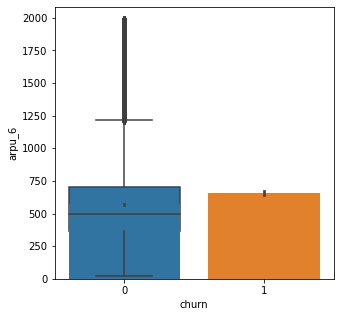

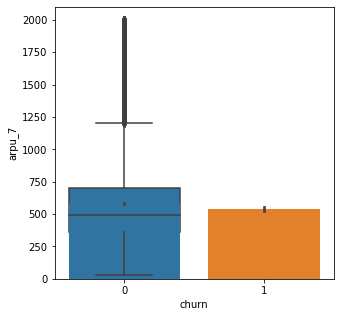

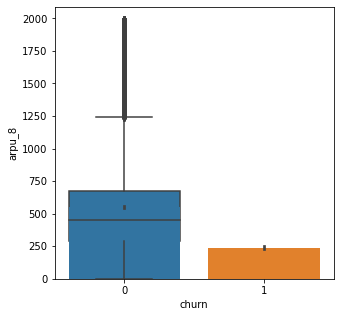

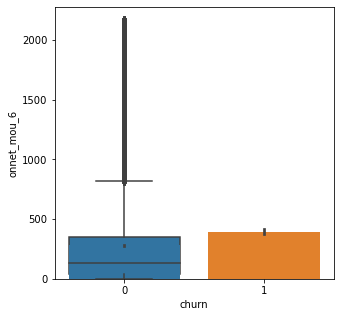

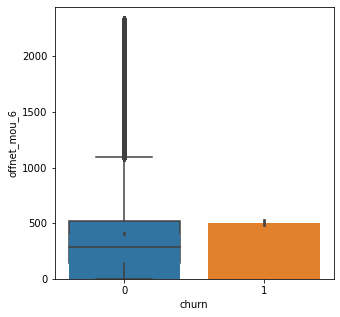

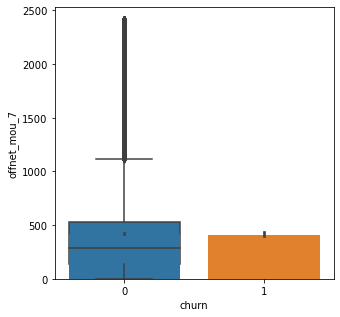

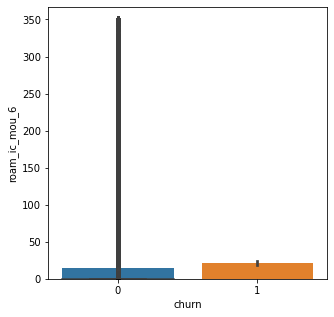

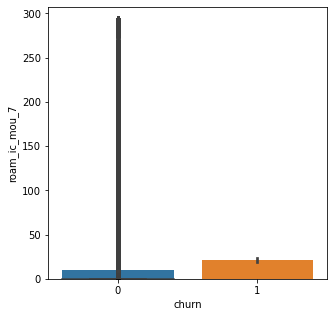

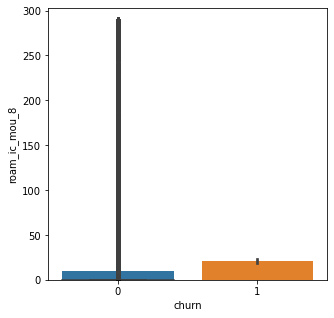

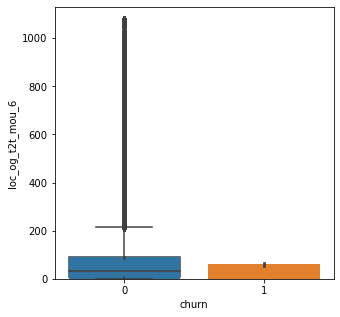

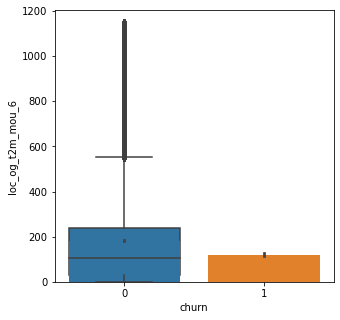

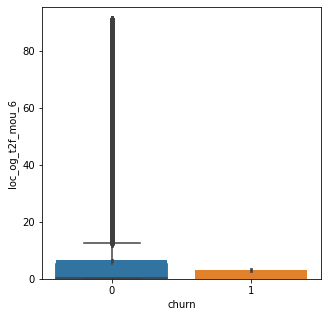

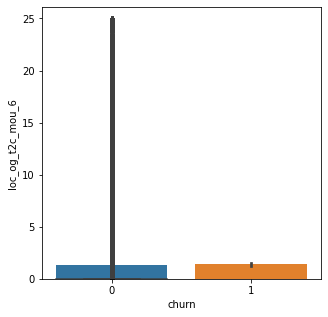

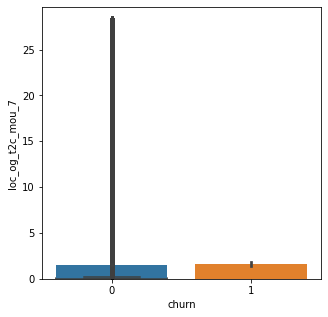

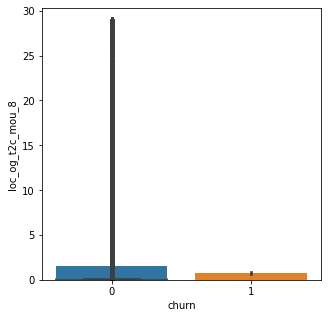

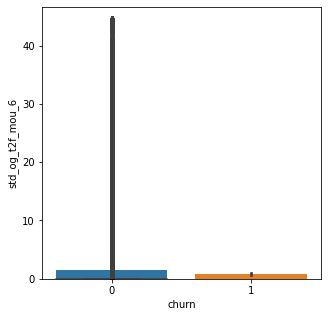

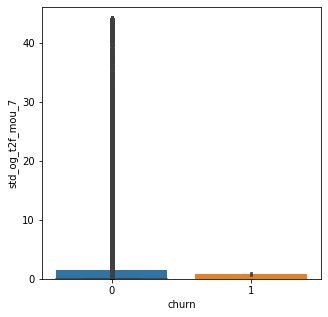

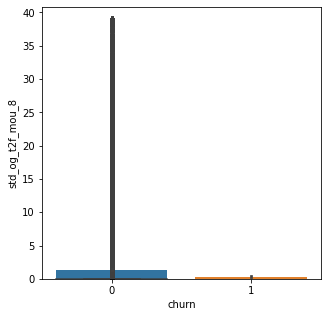

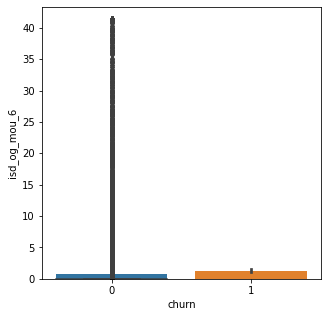

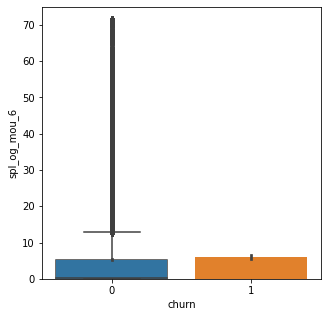

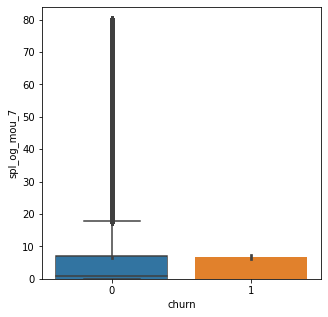

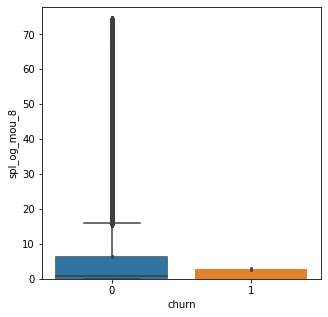

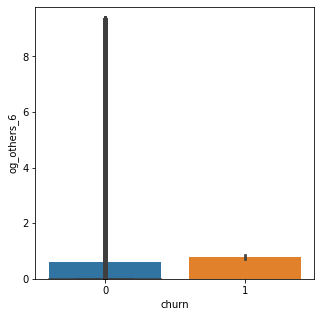

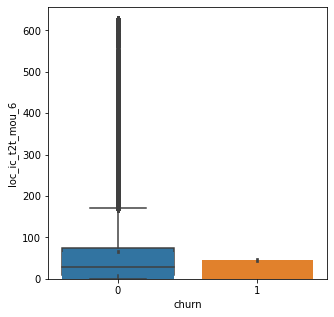

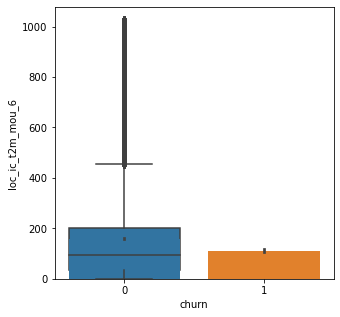

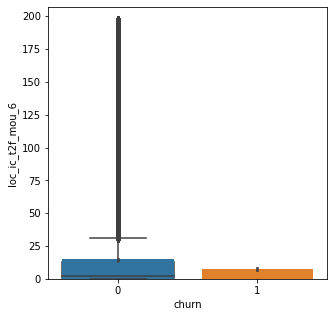

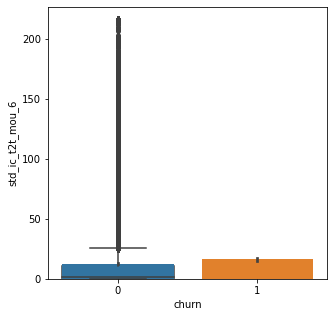

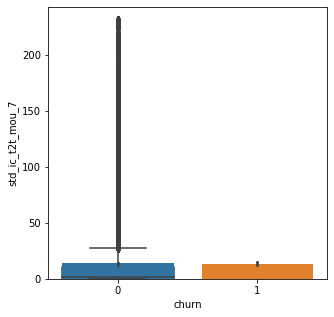

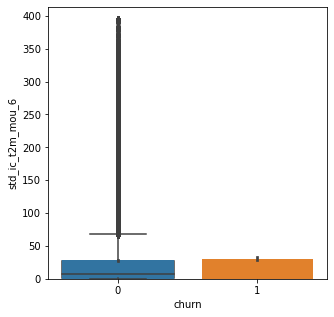

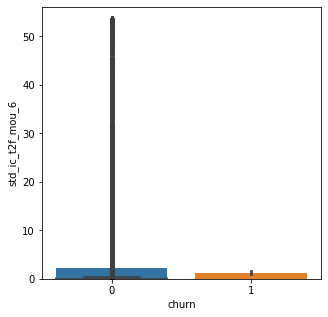

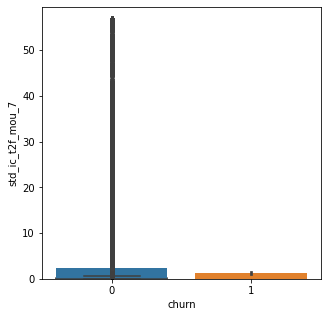

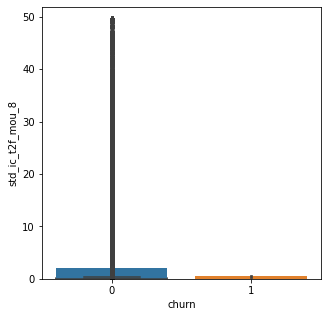

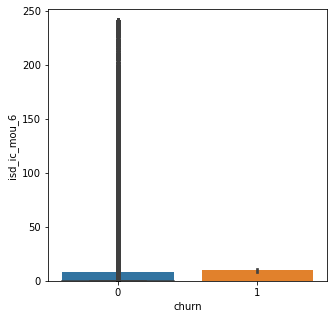

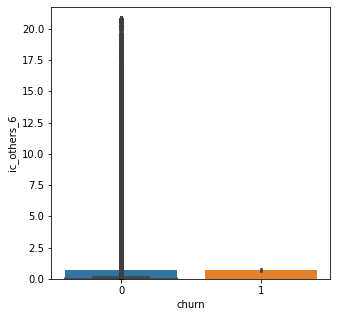

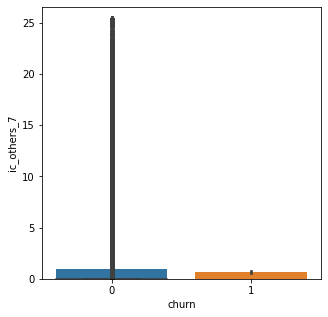

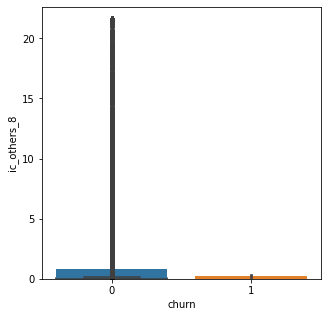

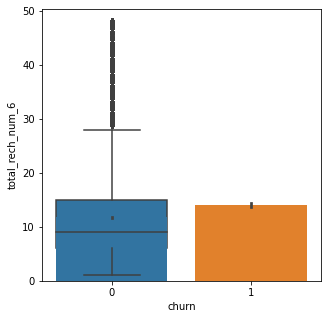

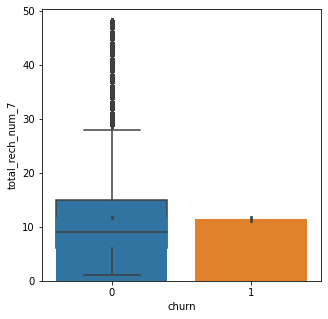

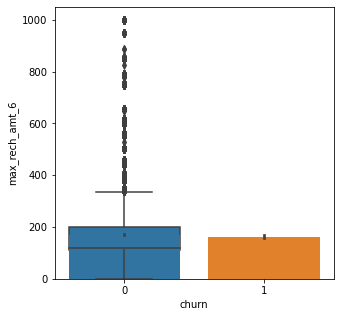

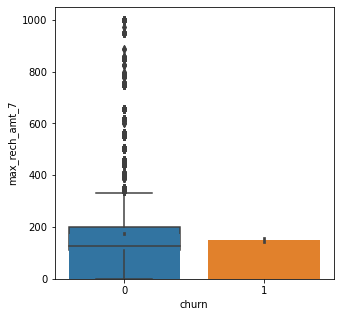

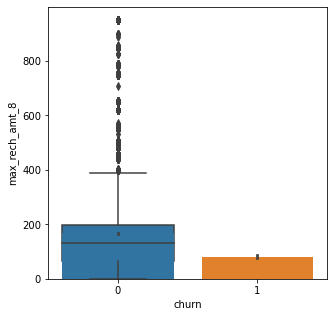

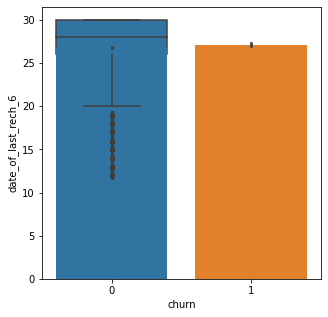

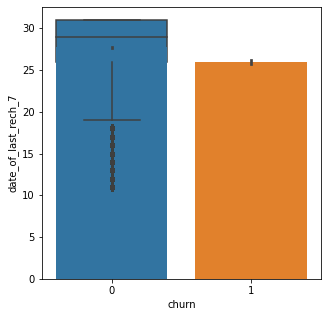

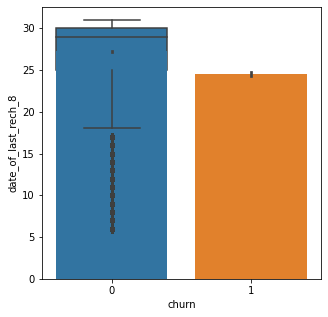

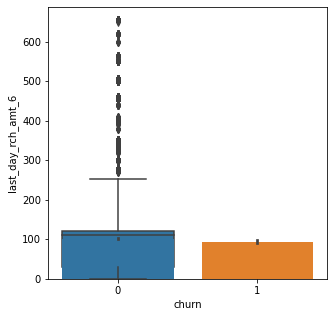

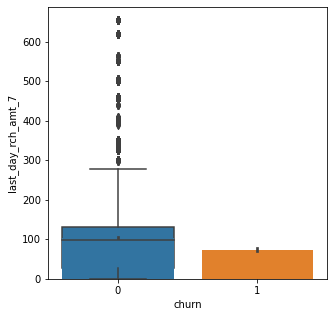

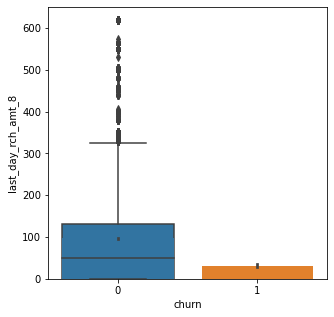

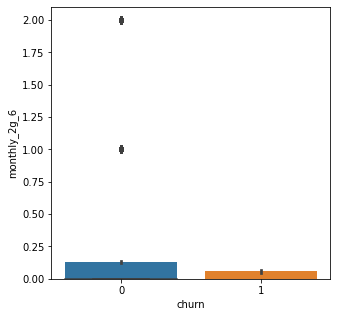

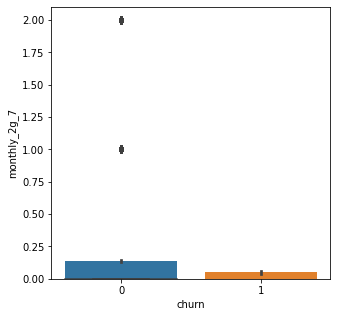

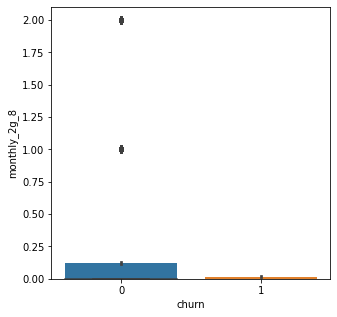

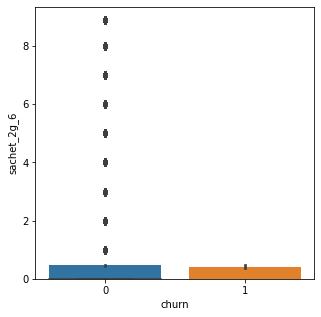

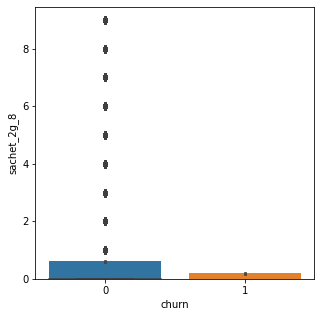

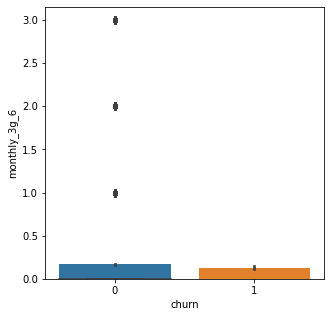

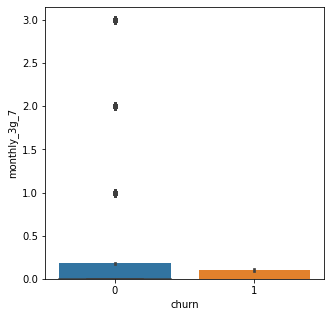

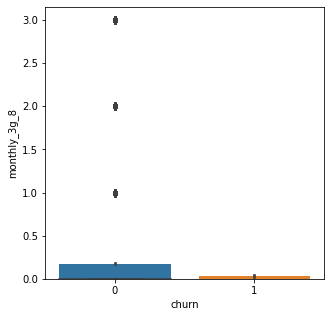

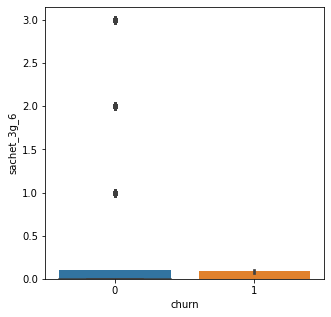

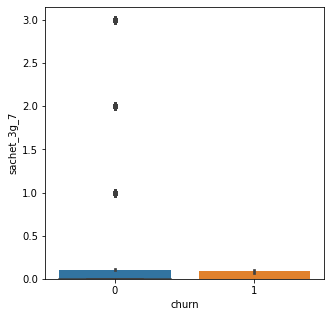

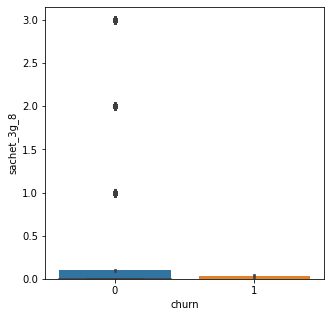

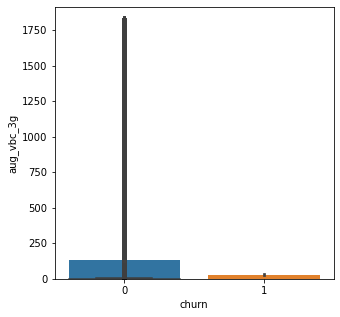

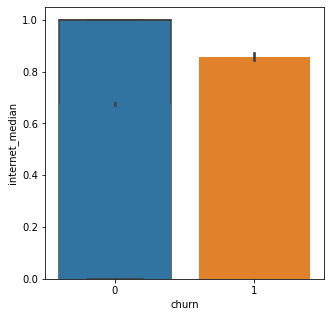

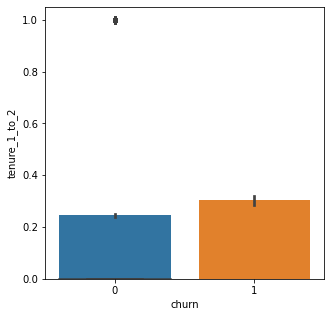

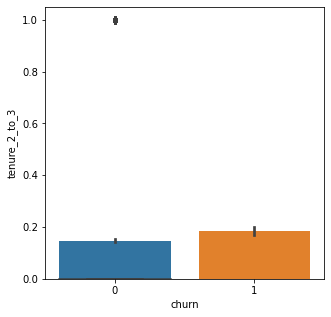

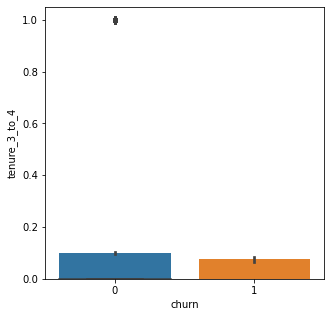

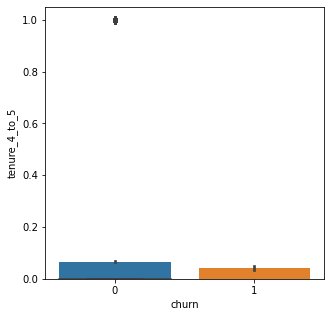

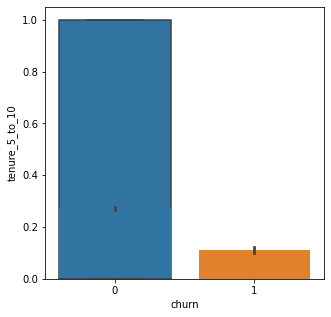

In [36]:
# Checking columns churning using box plot
num_cols = [col for col in new_df2.columns if col not in 'churn']

for col in num_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=new_df2)
    sns.barplot(x='churn', y=col, data=new_df2)

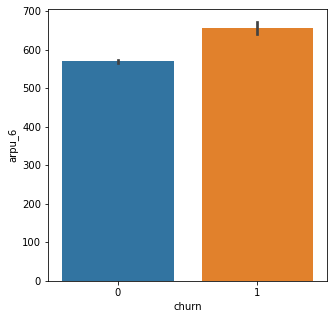

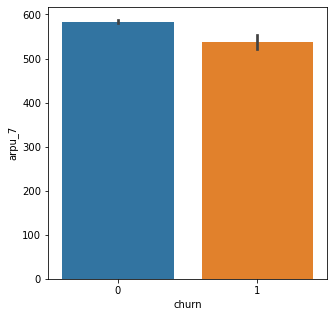

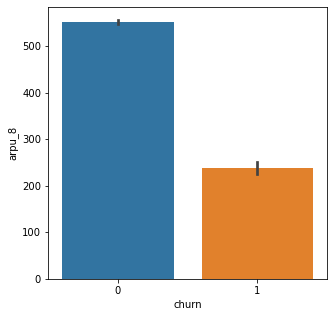

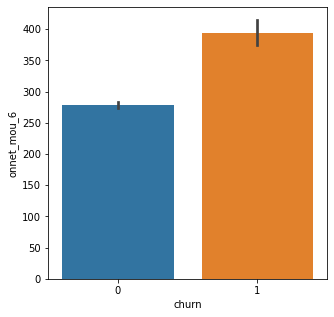

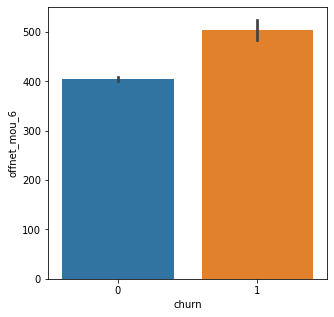

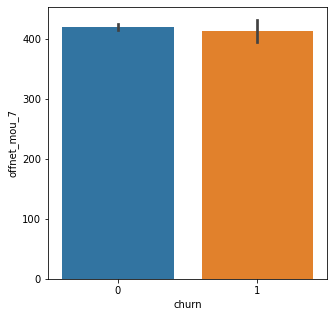

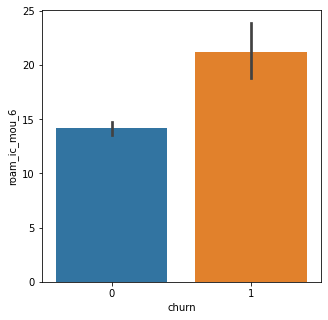

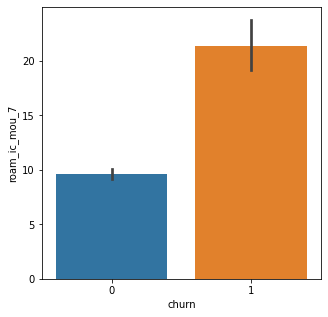

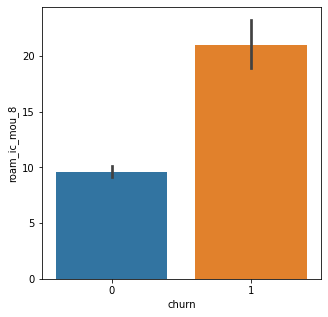

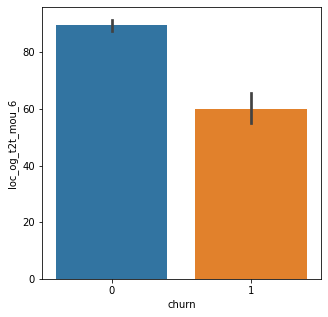

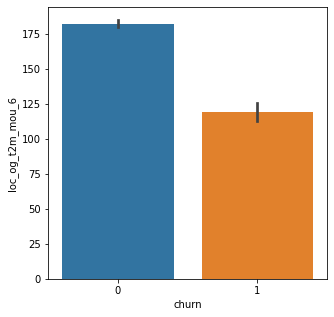

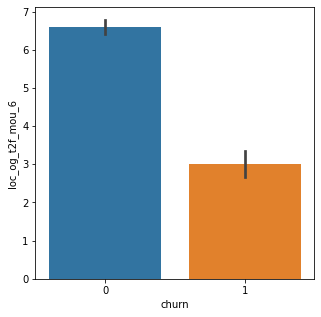

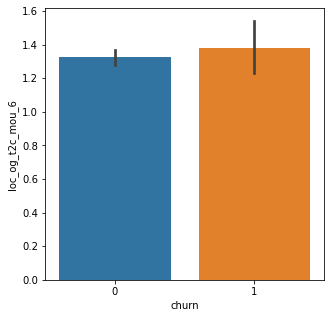

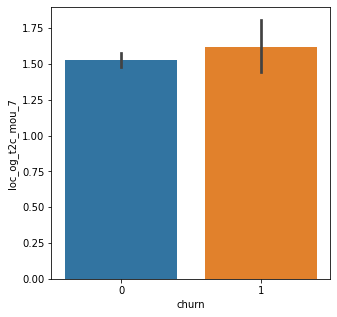

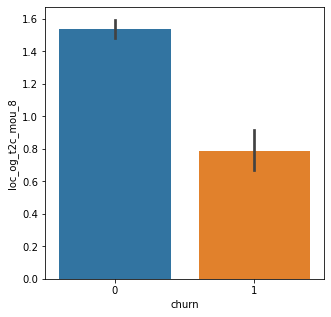

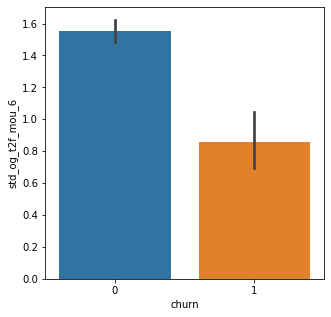

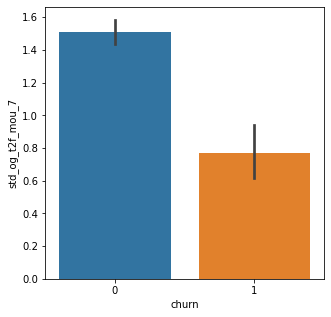

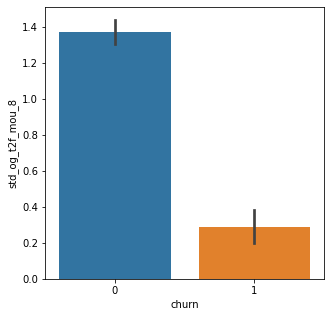

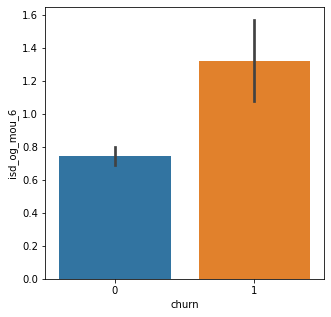

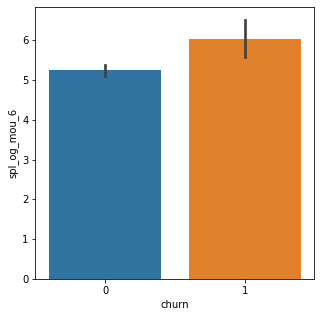

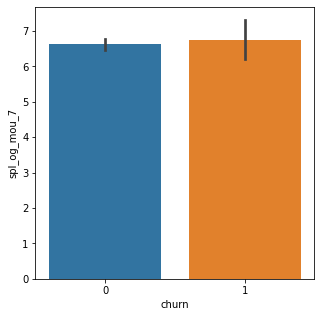

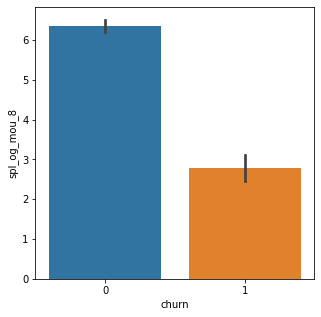

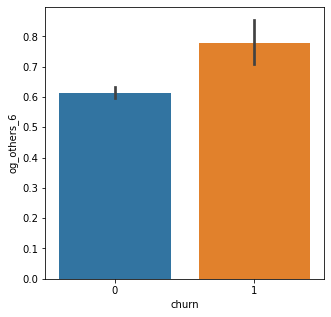

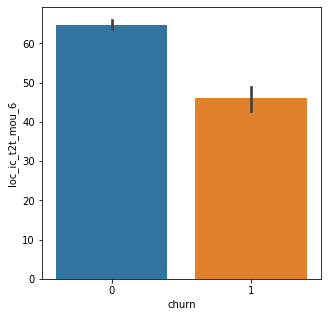

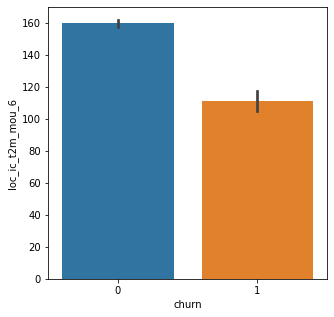

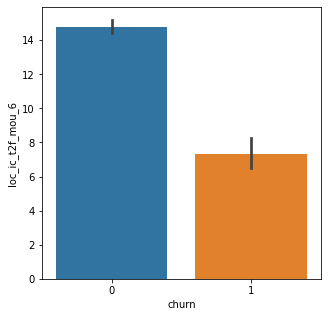

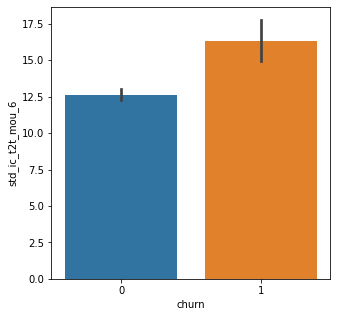

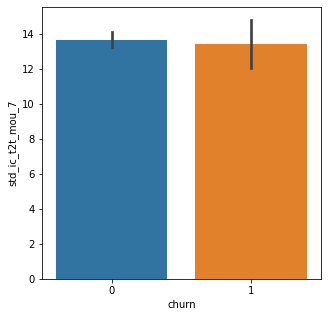

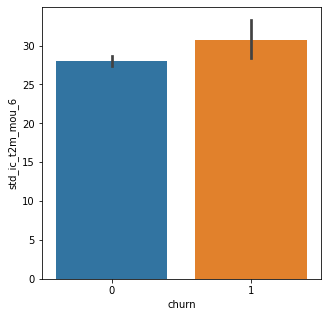

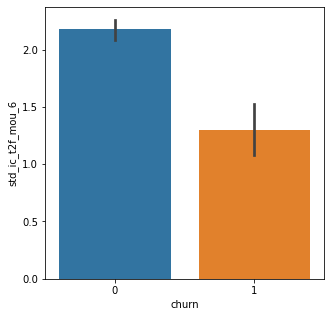

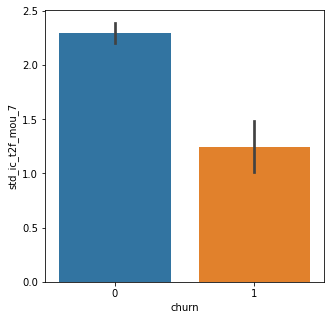

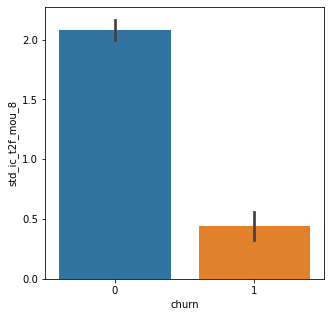

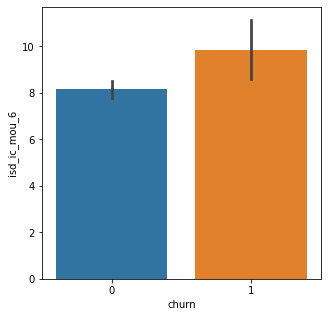

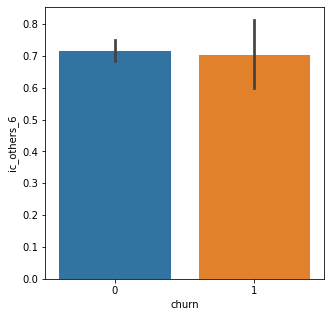

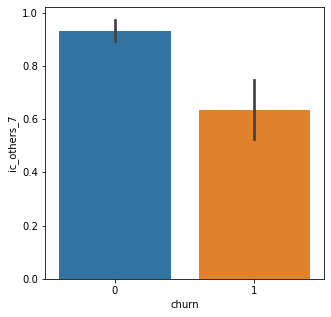

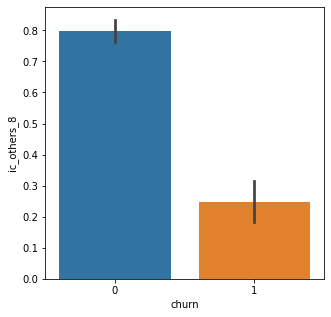

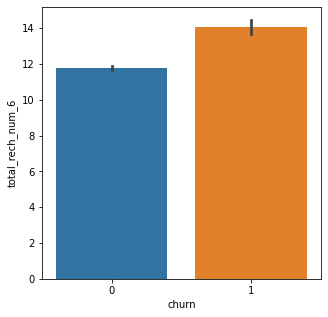

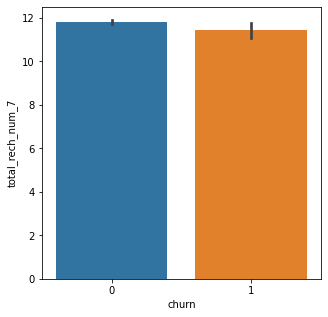

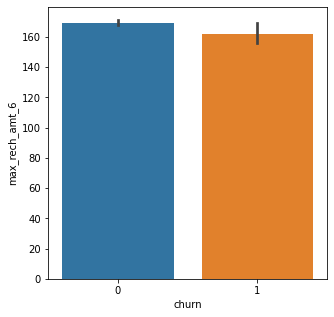

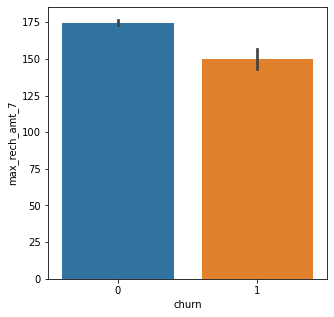

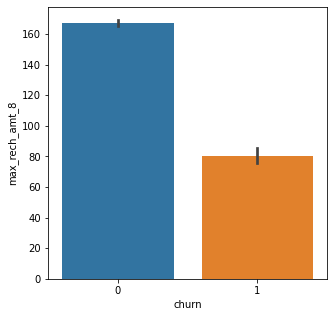

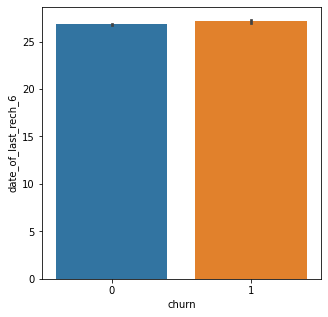

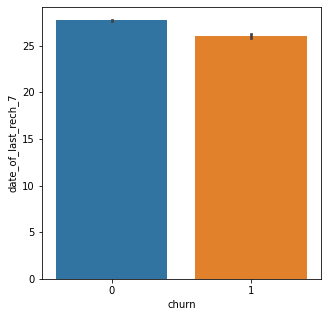

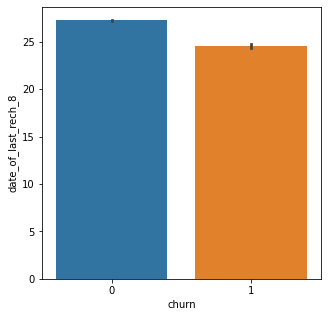

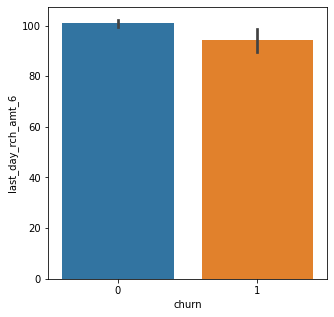

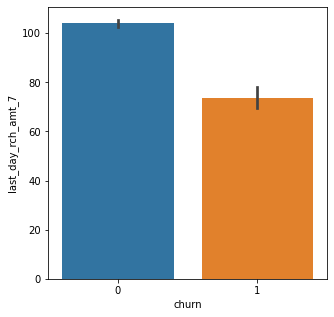

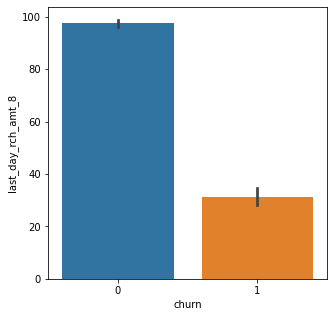

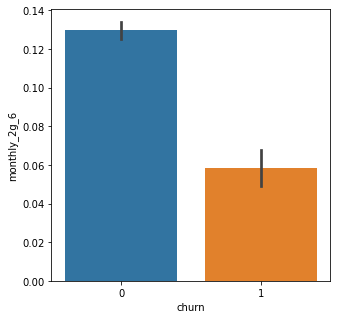

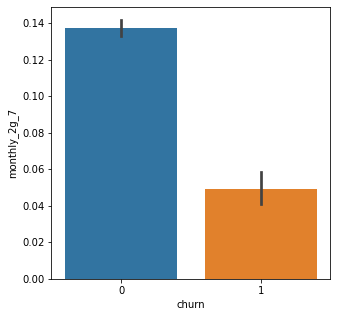

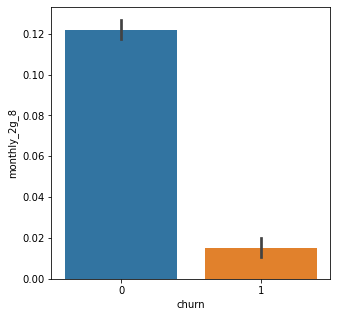

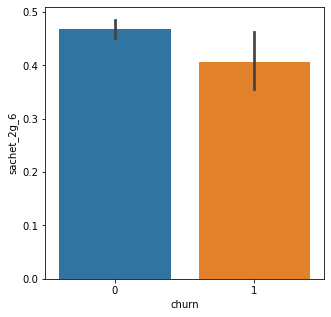

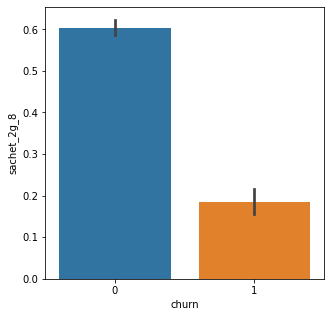

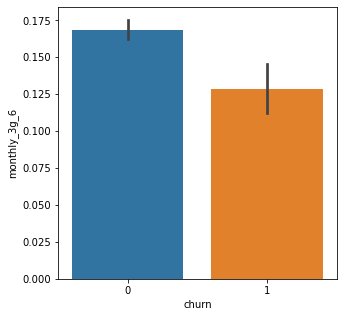

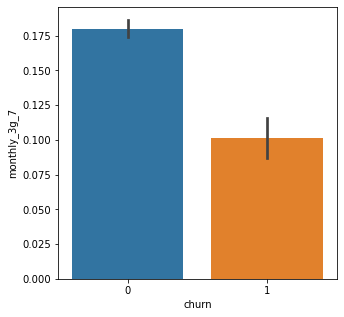

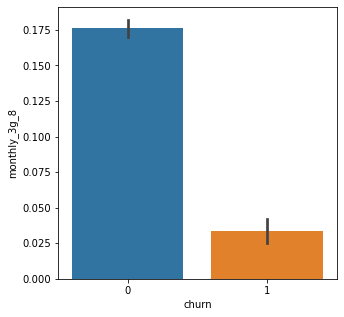

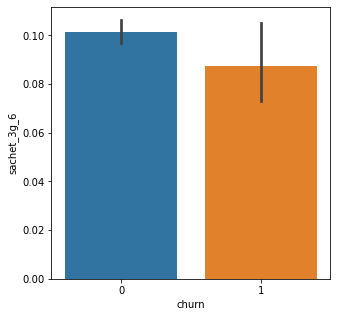

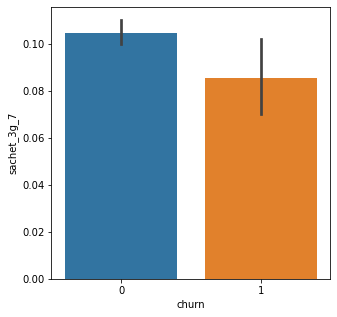

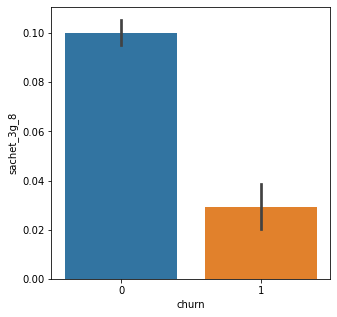

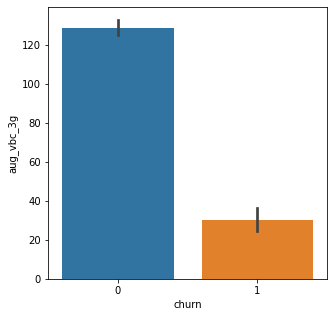

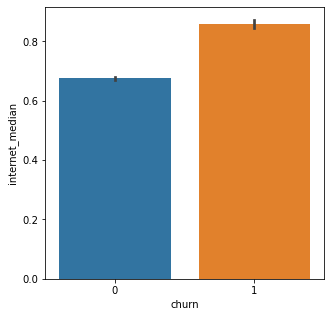

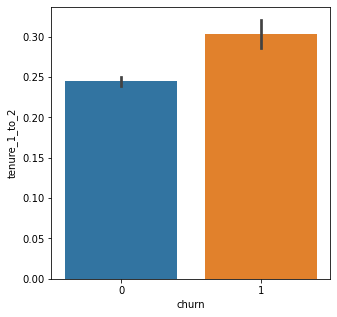

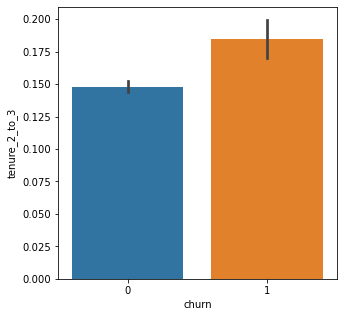

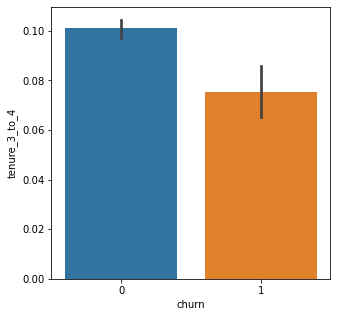

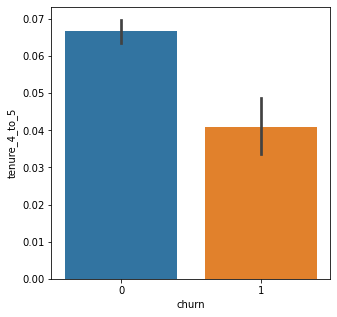

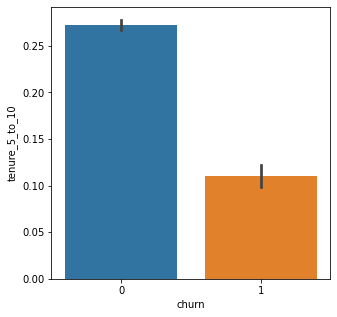

In [37]:
# checking columns churning using bar plot
num_cols = [col for col in new_df2.columns if col not in ['churn']]
for col in num_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=new_df2)

##### Analysis- As per above 
- Huge drop of churned customer in ARPU in 8 month.
- We can see the drop for offnet mou & On_net services in the 8th month
- Drop in sachet 2G & 3G services in 8th month for churned customers.
- We can see a drop in monthly subscription for both 2G & 3G for churned customers in 8th Month.
- We are getting a huge drop in 8th month recharge amount for churned customers.
- Huge drop in total recharge number also in the 8th month for churned customers.
- Drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

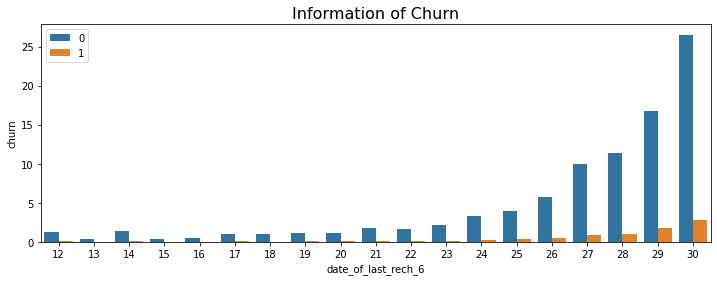

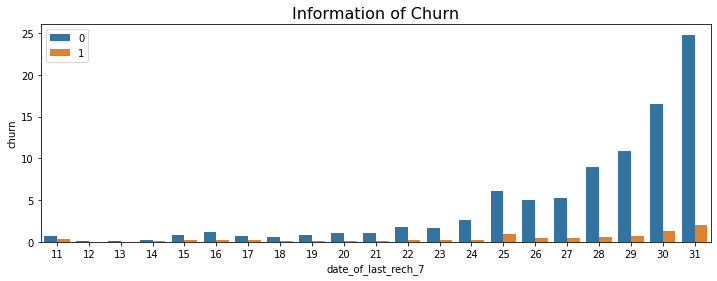

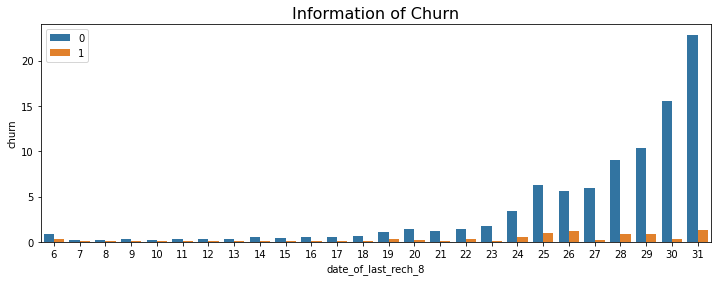

In [38]:
# Churn information for date_of_last_rech_6,7,8 month
plt.figure(figsize=(12,4))
sns.barplot(x = 'date_of_last_rech_6',y="churn", hue='churn', data =new_df2,  estimator=lambda x: len(x) / len(new_df2) * 100)
plt.title('Information of Churn', fontsize=16)
plt.legend(loc='upper left')

plt.figure(figsize=(12,4))
sns.barplot(x = 'date_of_last_rech_7',y="churn", hue='churn', data =new_df2,  estimator=lambda x: len(x) / len(new_df2) * 100)
plt.title('Information of Churn', fontsize=16)
plt.legend(loc='best')

plt.figure(figsize=(12,4))
sns.barplot(x = 'date_of_last_rech_8',y="churn", hue='churn', data =new_df2, estimator=lambda x: len(x) / len(new_df2) * 100)
plt.title('Information of Churn', fontsize=16)
plt.legend(loc='best')
plt.show()

In [39]:
new_df2.shape

(30011, 66)

In [40]:
new_df3=new_df2
new_df3.shape

(30011, 66)

## Step:3   Test-Train Split & Scale the feature

In [41]:
from sklearn.model_selection import train_test_split

# keeping feature variable to X
X=new_df3.drop('churn', axis=1)

# keeping response variable to y
y= new_df3['churn']

In [42]:
# Normalisation of X

def normalize (x):
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# Applying normalize to all columns 
X_new = X.apply(normalize) 
X_new.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,internet_median,tenure_1_to_2,tenure_2_to_3,tenure_3_to_4,tenure_4_to_5,tenure_5_to_10
7,0.534872,0.670892,1.000000,0.026699,0.194548,0.234973,0.046457,0.114480,0.109676,0.047749,...,0.0,0.0,0.0,0.031688,1.0,0.0,1.0,0.0,0.0,0.0
8,0.183468,0.236341,0.069098,0.190960,0.040253,0.033009,0.000000,0.000000,0.000000,0.276081,...,0.0,0.0,0.0,0.011542,0.0,0.0,0.0,0.0,0.0,0.0
13,0.241551,0.091148,0.298430,0.231613,0.177294,0.049053,0.067353,0.493061,0.249961,0.046114,...,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
16,0.210063,0.138877,0.094517,0.023316,0.126967,0.094906,0.000000,0.009674,0.000000,0.039591,...,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0
17,0.341896,0.000000,0.012827,0.547418,0.026052,0.000000,0.000000,0.016271,0.016673,0.036228,...,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0


In [43]:
# Split the data into train & test data set
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.7,test_size=0.3,random_state=100)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (21007, 65)
y_train dataset:  (21007,)
X_test dataset:  (9004, 65)
y_test dataset:  (9004,)


In [44]:
print("Before OverSampling, No. of label as '1': {}".format(sum(y_train==1)))
print("Before OverSampling, No. of label as '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, No. of label as '1': {}".format(sum(y_test==1)))
print("Before OverSampling, No. of label as '0': {} \n".format(sum(y_test==0)))

Before OverSampling, No. of label as '1': 1823
Before OverSampling, No. of label as '0': 19184 

Before OverSampling, No. of label as '1': 770
Before OverSampling, No. of label as '0': 8234 



## Step 4. Modelling

### PCA- Principal Component Analysis

In [45]:
# Import the PCA module
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

In [46]:
# Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [47]:
# List of PCA components.
pca.components_

array([[ 0.03706235,  0.0434906 ,  0.07240185, ..., -0.01257047,
         0.00291416,  0.47246414],
       [ 0.03171472,  0.05029602,  0.04537068, ...,  0.00462437,
         0.00141586, -0.51565442],
       [ 0.00656673,  0.00998113,  0.00346006, ...,  0.15361789,
         0.07016053, -0.37315802],
       ...,
       [-0.2397543 , -0.35827164,  0.29014094, ...,  0.00752867,
         0.00876913,  0.00693778],
       [ 0.04497466,  0.17104374, -0.0518448 , ..., -0.00086132,
         0.00140087, -0.00205212],
       [-0.58642896,  0.42726872,  0.00419493, ...,  0.00228856,
         0.00213424,  0.00286743]])

In [48]:
col_names=list(X_train.columns)

pca_df= pd.DataFrame({'PC_1':pca.components_[0],'PC_2':pca.components_[1], 
                       'PC_3':pca.components_[2],'PC_4':pca.components_[3],
                       'PC_5':pca.components_[4],'PC_6':pca.components_[5],
                       'PC_7':pca.components_[6],'PC_8':pca.components_[7],
                       'PC_9':pca.components_[8], 'PC_10':pca.components_[9],'Feature':col_names})

pca_df.head(10)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,Feature
0,0.037062,0.031715,0.006567,-0.022969,0.337861,0.031830,-0.000263,0.026856,-0.086368,-0.039772,arpu_6
1,0.043491,0.050296,0.009981,-0.014907,0.353228,0.028527,-0.029519,-0.083523,-0.077481,0.204972,arpu_7
2,0.072402,0.045371,0.003460,-0.007574,0.354977,0.035067,-0.029394,-0.094293,-0.065559,0.233797,arpu_8
3,-0.073167,-0.015622,0.020238,-0.054523,0.123315,0.011723,0.003963,-0.056546,0.008188,0.028937,onnet_mou_6
4,-0.040431,-0.025560,-0.003718,-0.035401,0.306697,0.023256,0.010687,0.160134,-0.084642,-0.027017,offnet_mou_6
5,-0.043460,-0.016613,-0.002382,-0.030582,0.302634,0.019161,-0.011165,0.077815,-0.068992,0.157643,offnet_mou_7
6,0.008580,-0.002032,0.000530,0.036157,0.044137,0.002271,-0.017438,-0.067952,-0.032709,0.137497,roam_ic_mou_6
7,0.006095,-0.000748,-0.000883,0.038410,0.048089,-0.000756,-0.018277,-0.042562,-0.034312,0.101169,roam_ic_mou_7
8,0.009113,0.001495,-0.000909,0.030308,0.062918,-0.000044,-0.011882,-0.035356,-0.028564,0.102985,roam_ic_mou_8
9,0.027837,-0.023390,-0.007885,-0.030499,0.095984,0.010578,0.021272,0.087395,-0.011665,-0.121440,loc_og_t2t_mou_6


In [49]:
# Check the variance ratios
pca.explained_variance_ratio_

array([0.12596524, 0.10509521, 0.07647131, 0.05528144, 0.05380134,
       0.04765928, 0.03120578, 0.03061698, 0.02833501, 0.02491216,
       0.02388643, 0.02192691, 0.019222  , 0.01833972, 0.01569141,
       0.01456106, 0.01411841, 0.01369718, 0.01312096, 0.01271492,
       0.01248019, 0.01153962, 0.01050134, 0.01039301, 0.00999886,
       0.00995324, 0.00950928, 0.00923497, 0.009154  , 0.00855211,
       0.00832388, 0.00754198, 0.00719081, 0.0066213 , 0.00659218,
       0.00648534, 0.00614749, 0.00595244, 0.0059097 , 0.00567838,
       0.00567294, 0.00515353, 0.00488269, 0.00484391, 0.00470485,
       0.0043075 , 0.0042083 , 0.00403905, 0.00374102, 0.00366925,
       0.00363845, 0.00354371, 0.00339912, 0.00314671, 0.00310376,
       0.00294686, 0.00279643, 0.00267487, 0.00260938, 0.00257584,
       0.00239502, 0.00226647, 0.00216912, 0.00186985, 0.00125854])

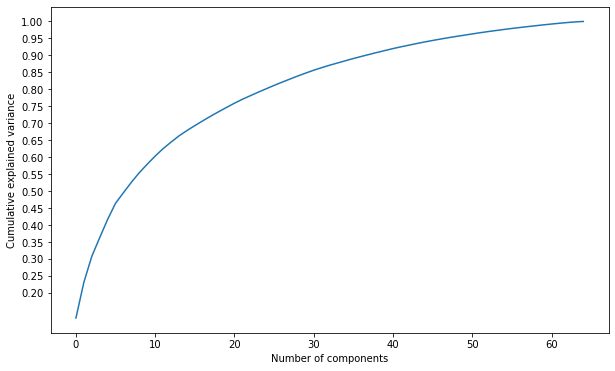

In [50]:
# Screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0.2,1.05,0.05))
plt.show()

Approx 95% of variance is explained by 50 components.

#### Dimensionality reduction using Incremental PCA

In [51]:
# Incremental PCA for efficiency checking
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=50)

pca_final_1 = pca_final.fit_transform(X_train)
pca_final_1.shape

(21007, 50)

<AxesSubplot:>

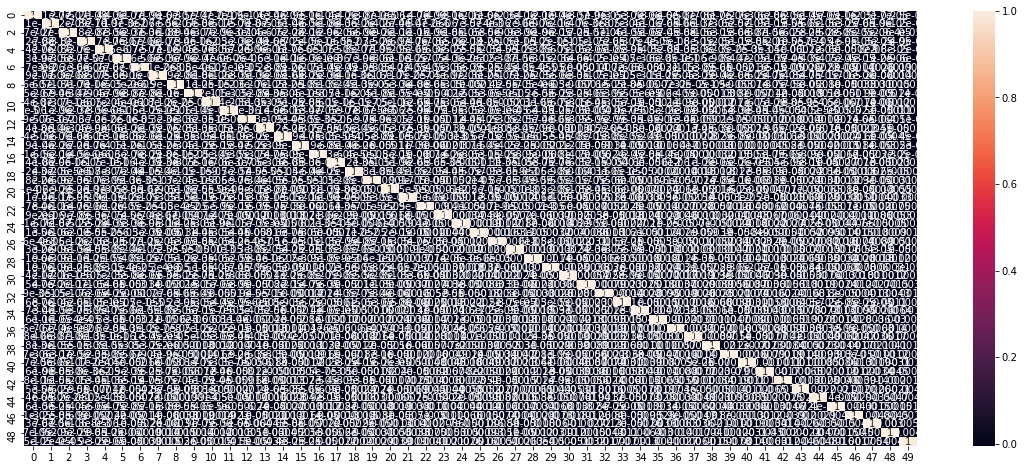

In [52]:
# Check corelation after performing PCA
Corr_matrix = np.corrcoef(pca_final_1.transpose())

# Correlation matrix
%matplotlib inline
plt.figure(figsize = (20,8))
sns.heatmap(Corr_matrix,annot = True)

In [53]:
Corr_new= Corr_matrix - np.diagflat(Corr_matrix.diagonal())
print("max corr:",Corr_new.max(), ", min corr: ", Corr_new.min(),)

max corr: 0.005359478872074076 , min corr:  -0.004806811201528578


Correlation are almost approx 0.

In [54]:
# Applying selected components to the test data 40 components
pca_test = pca_final.transform(X_test)
pca_test.shape

(9004, 50)

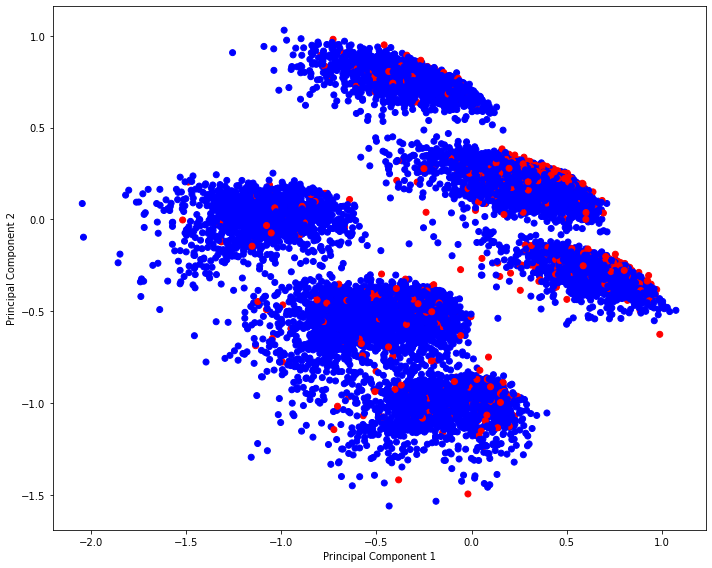

In [55]:
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.scatter(pca_final_1[:,0], pca_final_1[:,1], c = y_train.map({0:'blue',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Logistic Regression with PCA

In [56]:
#Training the model on the train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from imblearn.over_sampling import SMOTE


learn_pca = LogisticRegression(class_weight='balanced')
model_pca = learn_pca.fit(pca_final_1, y_train)


In [57]:
pred_probs_test = model_pca.predict_proba(pca_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [58]:
# Prediction on the test data
pred_test = model_pca.predict_proba(pca_test)
y_pred_default = model_pca.predict(pca_test)

##### Model Evaluation

In [59]:
# Classification Report

print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6676 1558]
 [ 137  633]]
0.811750333185251


In [68]:
# Converting y_pred to a dataframe as its an array
y_pred_df = pd.DataFrame(pred_test)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test, y_pred_1],axis=1)

# Column renaming
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_predicted'})
y_pred_final.head()

,churn,churn_predicted
0,0,0.814095
1,0,0.617603
2,0,0.045473
3,0,0.213047
4,0,0.286192


In [61]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_predicted)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8819413644407571


##### ROC Curve

In [62]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

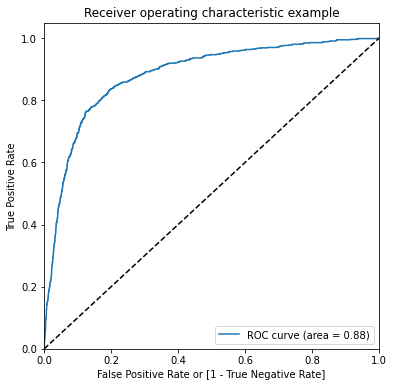

(array([0.00000000e+00, 0.00000000e+00, 1.21447656e-04, ...,
        9.99757105e-01, 9.99878552e-01, 1.00000000e+00]),
 array([0.       , 0.0012987, 0.0012987, ..., 1.       , 1.       ,
        1.       ]),
 array([1.99804305e+00, 9.98043046e-01, 9.96873760e-01, ...,
        2.18159221e-04, 1.67149900e-04, 4.73047790e-05]))

In [63]:
draw_roc(y_pred_final.churn, y_pred_final.churn_predicted)

In [64]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_predicted.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.814095,1,1,1,1,1,1,1,1,1,0
1,0,0.617603,1,1,1,1,1,1,1,0,0,0
2,0,0.045473,1,0,0,0,0,0,0,0,0,0
3,0,0.213047,1,1,1,0,0,0,0,0,0,0
4,0,0.286192,1,1,1,0,0,0,0,0,0,0


In [65]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
Cutoff_data = pd.DataFrame( columns = ['Prob','Accuracy','Sensi','Speci'])

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    Speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    Cutoff_data.loc[i] =[ i ,Accuracy,Sensi,Speci]
    
print(Cutoff_data)

     Prob  Accuracy     Sensi     Speci
0.0   0.0  0.085518  0.000000  1.000000
0.1   0.1  0.311417  0.248846  0.980519
0.2   0.2  0.481675  0.437090  0.958442
0.3   0.3  0.622723  0.594365  0.925974
0.4   0.4  0.735118  0.722006  0.875325
0.5   0.5  0.811750  0.810785  0.822078
0.6   0.6  0.867725  0.878309  0.754545
0.7   0.7  0.895047  0.920087  0.627273
0.8   0.8  0.911928  0.952514  0.477922
0.9   0.9  0.915260  0.979475  0.228571


<AxesSubplot:xlabel='Prob'>

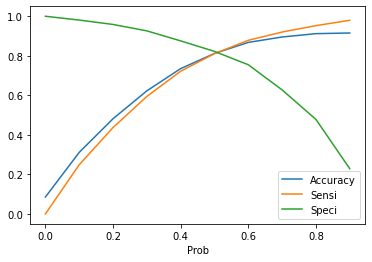

In [66]:
# Plotting the  accuracy sensitivity and specificity for various probability.
Cutoff_data.plot.line(x='Prob', y=['Accuracy','Sensi','Speci'])

We can say from above plot that around 0.5 is the optimum point to take it as cutoff probability.

In [69]:
# Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold= Find_Optimal_Cutoff(y_pred_final.churn, y_pred_final.churn_predicted)
print('Threshold: ',threshold)

Threshold:  [0.507612546832447]


In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.50 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_predicted.map( lambda x: 1 if x > 0.50 else 0)

y_pred_final.churn.value_counts()

In [ ]:
# Now again check the Accuracy
print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

Accuracy is 81%.

In [ ]:
# Now again check confusion matrix
confusion_m = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion_m

In [ ]:
TP = confusion_m[1,1] # True positive 
TN = confusion_m[0,0] # True negatives
FP = confusion_m[0,1] # False positives
FN = confusion_m[1,0] # False negatives

# Check sensitivity of our model
print('Sensitivity: ', TP/float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# Positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

As we can see that from above model accuracy and Sensitivity are good.

### Logistic Regression with PCA:-

- Accuracy Score on test data:  0.811750333185251
- Sensitivity:  0.8220779220779221
- Specificity:  0.8107845518581491
- False postive rate:  0.18921544814185087
- Positive predictive value:  0.2889091738931995
- Negative predictive value:  0.9798913841185968
- Misclassification Rate:  0.188249666814749

## Decision Tree Classifier with PCA

In [ ]:
# Import decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(pca_final_1, y_train)

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(pca_test)

# Printing classification report
print('Classification Report: ', classification_report(y_test, y_pred_default))
print('Confusion Matrix: ', confusion_matrix(y_test,y_pred_default))
print('Accuracy Score: ', accuracy_score(y_test,y_pred_default))

In [ ]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Accuracy Score:', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity of this model is not good so will hypertune the parameter.

#### Hyperparameter Tuning

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dec_tree = DecisionTreeClassifier(criterion = "gini", 
                                  class_weight='balanced',
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dec_tree, parameters, 
                    cv=n_folds,
                    scoring="accuracy",
                   return_train_score=True)

tree.fit(pca_final_1, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Let's see what will be the optimum value for min_samples_leaf.

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dec_tree = DecisionTreeClassifier(criterion = "gini",
                                   class_weight='balanced',
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dec_tree, parameters,
                   cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(pca_final_1, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Let's see what will be the optimum value for min_samples_split.

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dec_tree = DecisionTreeClassifier(criterion = "gini",
                                   class_weight='balanced',
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dec_tree, parameters,
                   cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(pca_final_1, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increase the min_samples_split, the tree overfits lesser since the model is less complex.

##### Grid Search to Find Optimal Hyperparameters

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dec_tree = DecisionTreeClassifier(class_weight='balanced')

grid_search = GridSearchCV(estimator = dec_tree, param_grid = param_grid, refit='recall_score', 
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(pca_final_1, y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(pca_final_1,y_train)

In [ ]:
# accuracy score
clf_gini.score(pca_test,y_test)

In [ ]:
y_pred_default = clf_gini.predict(pca_test)
confusion_tree_hp=confusion_matrix(y_test,y_pred_default)
confusion_tree_hp

In [ ]:
TP = confusion_tree_hp[1,1] # true positive 
TN = confusion_tree_hp[0,0] # true negatives
FP = confusion_tree_hp[0,1] # false positives
FN = confusion_tree_hp[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

- Accuracy-0.7923145268769436
- Sensitivity:  0.612987012987013
- Specificity:  0.8090842846733058
- False postive rate:  0.19091571532669419
- Positive predictive value:  0.2309197651663405
- Negative predictive value:  0.957183908045977
- Misclassification Rate:  0.2076854731230564

### Random Forest Classifier with PCA

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [ ]:
# fit
rfc.fit(pca_final_1,y_train)

# Making predictions
predictions = rfc.predict(pca_test)

In [ ]:
# Printing classification report
print('Classification Report: ', classification_report(y_test, predictions))
print('Accuracy Score: ', accuracy_score(y_test,predictions))

In [ ]:
confusion_rfc=confusion_matrix(y_test,predictions)
confusion_rfc

In [ ]:
TP = confusion_rfc[1,1] # true positive 
TN = confusion_rfc[0,0] # true negatives
FP = confusion_rfc[0,1] # false positives
FN = confusion_rfc[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

##### Though Accuracy, Sensitivity is good for random forest lets try hyperparameter tuning also.

#### Hyperparameter Tuning- Random Forest

In [ ]:
# Tuning Max_Depth
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True, n_jobs=-1)
rf.fit(pca_final_1, y_train)


In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increase the value of max_depth, both train and test scores increase till a point, but after that score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Controlling the depth of the constituent trees will help reduce overfitting in the forest.

In [ ]:
# Tuning N_estimators
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True, n_jobs=-1)
rf.fit(pca_final_1, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Tuning Max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True, n_jobs=-1)
rf.fit(pca_final_1, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True, n_jobs=-1)
rf.fit(pca_final_1, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True, n_jobs=-1)
rf.fit(pca_final_1, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(pca_final_1, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

**Fitting the final model with the best parameters obtained from grid search.**

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             class_weight='balanced',
                             max_depth=10,
                             max_features=5,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=300)
# fit
rfc.fit(pca_final_1,y_train)

In [ ]:
# predict
predictions = rfc.predict(pca_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
# Confusion Matrix
confusion_rf_hp=confusion_matrix(y_test,predictions)
confusion_rf_hp

In [ ]:
TN = confusion_rf_hp[0,0] # true positive 
TP = confusion_rf_hp[1,1] # true negatives
FP = confusion_rf_hp[0,1] # false positives
FN = confusion_rf_hp[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

### Recomendation for Model Selection
- Logistic Regression and Random Forest performed better than Decision Tree for the given data set for the analysis of customer churn, using PCA.
- LogisticRegression with PCA is the best model with Sensitivity 82%. 
- Accuracy of RandomForest is highest with 85%.

#### LogisticRegression with PCA
- Accuracy Score on test data : 0.811750333185251
- Sensitivity: 0.8220779220779221 

#### DecisionTree with PCA
- Accuracy-0.7923145268769436
- Sensitivity:  0.612987012987013 
    
#### RandomForest
- Accuracy Score:   0.8561750333185251
- Sensitivity:  0.6922077922077922

### Important Variable

In [ ]:
from collections import OrderedDict

features_name=list(X_train.columns.values)
features_dict={}

for name, importance in zip(features_name, rfc.feature_importances_):
    features_dict[name]=importance
    
#Sorting Dictionary in descending order of the importance variable
dict_desc = OrderedDict(sorted(features_dict.items(), key=lambda kv: kv[1], reverse=True))

In [ ]:
#Search -Variable Importance top variable
dix= dict(dict_desc)

from itertools import islice

def look(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=10
n_items = look(n, dix.items())

In [ ]:
print('Top 10 driver variables: ', n_items)

In [ ]:
impo=rfc.feature_importances_
C_names=X_train.columns.values
impo, C_names=zip(*sorted(zip(impo,C_names)))

data_1=pd.DataFrame({"Variable":C_names,"importance":impo})
data_2 = data_1.sort_values(by="importance", axis=0, ascending=False)
data_2 = data_2.reset_index(drop=True)

In [ ]:
# Plot the variable vs importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Variable', y= 'importance', data=data_2[0:10])
plt.xlabel('Top 10 Variable') 
plt.ylabel('Importance')
plt.title('Top 10 Variables/Importance')
plt.xticks(rotation=60)
plt.show()

# Summary : 

- Behaviour is 8 Month can be the base of Churn Analysis.
- Very Less amount of High Value customers are churning which is a good service indicator.
- Std Outgoing Calls and Average Revenue Per Customer are strong indicators of Churn.
- People with less than 4 Yrs of Tenure are more likely to Churn and company should concentrate more on that segment by           rolling out new schemes to that group.
- Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.
- Volume Based Cost is not a good indicator of churn.
- Max Recharge amount could be a good Churn Indicator.
- Local Incoming & Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn Behaviour.
- Random Forest is the best method to Predict Churn followed by logistic Regression.
